## <center> Rainfall Prediction and Analysis






In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For deep learning
import tensorflow as tf
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing dataset and reading it
dataset=pd.read_csv("/content/rainfall in india 1901-2015.csv",encoding = "ISO-8859-1")

In [3]:
dataset.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [7]:
dataset.SUBDIVISION.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [10]:
groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data=groups.get_group(('EAST UTTAR PRADESH'))
data.head()

<ipython-input-10-bdc326428a83>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
1012,1901,62.6,31.3,8.2,1.1,13.6,21.8,226.5,285.6,215.4,0.1,2.1
1013,1902,6.1,2.3,2.4,2.0,21.4,32.5,411.5,155.4,257.2,1.2,0.0
1014,1903,8.2,0.4,1.3,0.7,15.3,71.6,115.3,420.2,258.7,0.0,0.0
1015,1904,7.3,1.5,8.3,0.4,28.7,148.0,359.4,328.8,95.0,17.0,26.3
1016,1905,16.8,23.6,20.0,5.4,15.4,17.3,302.4,316.2,169.5,0.0,1.6


In [11]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,62.6
1,1,1902,JAN,6.1
2,2,1903,JAN,8.2
3,3,1904,JAN,7.3
4,4,1905,JAN,16.8


In [12]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,62.6
115,115,1901,FEB,31.3
230,230,1901,MAR,8.2
345,345,1901,APR,1.1
460,460,1901,MAY,13.6


In [13]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [14]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,62.6
115,115,1901,FEB,31.3
230,230,1901,MAR,8.2
345,345,1901,APR,1.1
460,460,1901,MAY,13.6


In [15]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,62.6
115,115,1901,2,31.3
230,230,1901,3,8.2
345,345,1901,4,1.1
460,460,1901,5,13.6
575,575,1901,6,21.8
690,690,1901,7,226.5
805,805,1901,8,285.6
920,920,1901,9,215.4
1035,1035,1901,11,0.1


In [16]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,62.6,1901-01-01
115,115,1901,2,31.3,1901-02-01
230,230,1901,3,8.2,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,13.6,1901-05-01
575,575,1901,6,21.8,1901-06-01
690,690,1901,7,226.5,1901-07-01
805,805,1901,8,285.6,1901-08-01
920,920,1901,9,215.4,1901-09-01
1035,1035,1901,11,0.1,1901-11-01


In [17]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,62.6
115,31.3
230,8.2
345,1.1
460,13.6


In [18]:
series=dataset
series.head()

,avg_rainfall
0,62.6
115,31.3
230,8.2
345,1.1
460,13.6


In [19]:
series.shape

(1265, 1)

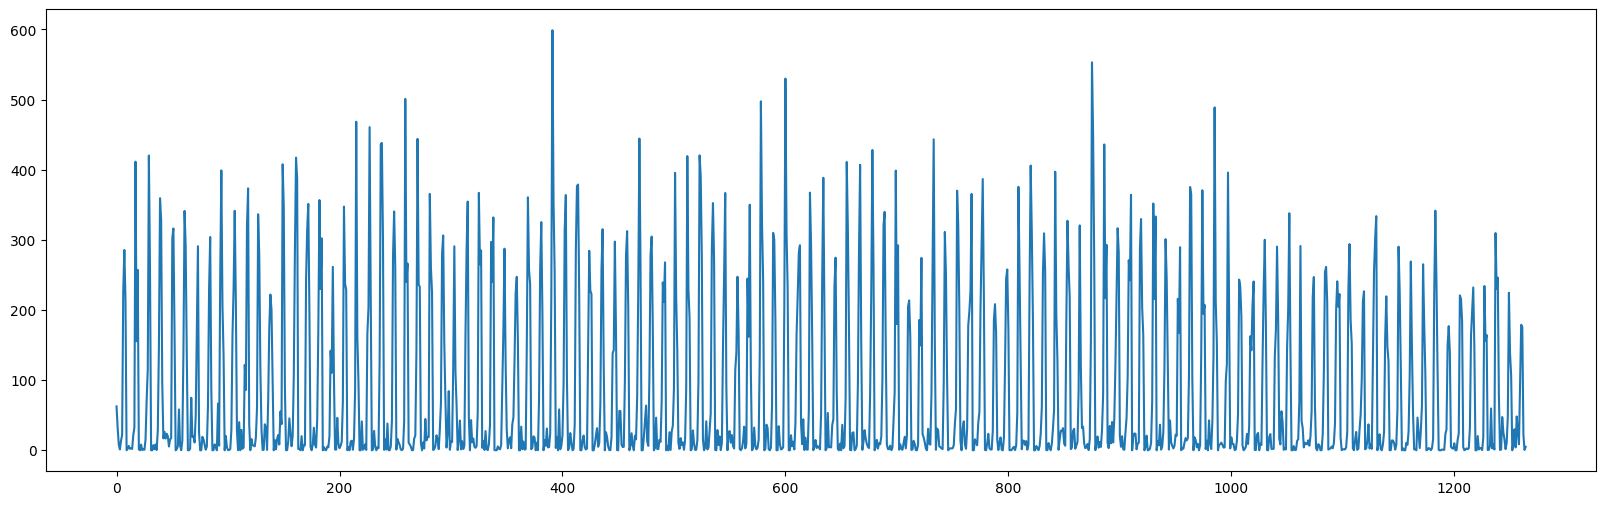

In [20]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [23]:
data_raw = series.values.astype("float32")

scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

In [24]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1012, 253)


In [25]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [26]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1010, 1)
New training data shape:
(1010, 1, 1)


In [27]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()

    model.add(LSTM(2000,activation = 'tanh', input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error",
                  optimizer = "adam")
    model.fit(train_X,
              train_Y,
              epochs = 10,
              batch_size = 64,
              )

    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
16/16 [==============================] - 11s 518ms/step - loss: 0.0348
Epoch 2/10
16/16 [==============================] - 7s 455ms/step - loss: 0.0338
Epoch 3/10
16/16 [==============================] - 8s 506ms/step - loss: 0.0331
Epoch 4/10
16/16 [==============================] - 8s 520ms/step - loss: 0.0318
Epoch 5/10
16/16 [==============================] - 7s 450ms/step - loss: 0.0319
Epoch 6/10
16/16 [==============================] - 8s 519ms/step - loss: 0.0330
Epoch 7/10
16/16 [==============================] - 10s 643ms/step - loss: 0.0315
Epoch 8/10
16/16 [==============================] - 7s 459ms/step - loss: 0.0309
Epoch 9/10
16/16 [==============================] - 8s 530ms/step - loss: 0.0308
Epoch 10/10
16/16 [==============================] - 8s 512ms/step - loss: 0.0316


In [28]:
import math
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

8/8 [==============================] - 0s 39ms/step
Training data score: 107.48 RMSE
Test data score: 79.18 RMSE


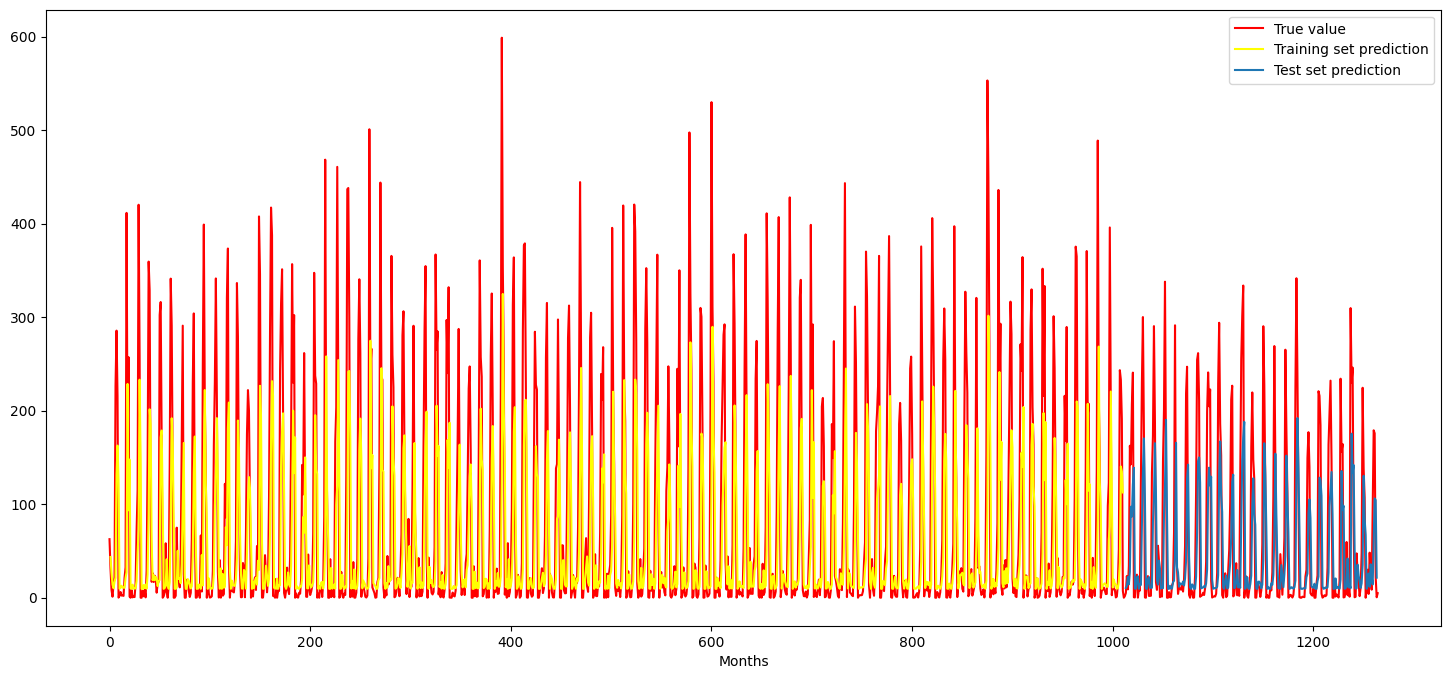

In [29]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


plt.legend()
plt.show()

In [30]:
test_predict

array([[ 10.444645 ],
       [ 12.298097 ],
       [ 22.152752 ],
       [ 14.368748 ],
       [ 27.9687   ],
       [ 97.30403  ],
       [ 86.64299  ],
       [120.841064 ],
       [138.95712  ],
       [  9.790294 ],
       [  9.681238 ],
       [ 21.608835 ],
       [ 22.968512 ],
       [  9.572171 ],
       [ 14.695606 ],
       [ 13.660465 ],
       [ 78.53679  ],
       [133.70515  ],
       [170.33994  ],
       [105.32355  ],
       [  9.681238 ],
       [  9.517628 ],
       [ 19.976707 ],
       [ 22.09836  ],
       [ 10.553694 ],
       [ 10.608201 ],
       [ 10.662731 ],
       [ 81.92059  ],
       [102.9192   ],
       [165.23024  ],
       [110.50197  ],
       [ 18.616169 ],
       [ 14.096346 ],
       [ 39.741478 ],
       [ 31.063967 ],
       [  9.844831 ],
       [ 10.880809 ],
       [ 10.172007 ],
       [ 87.98368  ],
       [117.859024 ],
       [190.19565  ],
       [ 89.05595  ],
       [  9.517628 ],
       [  9.517628 ],
       [ 12.7886   ],
       [  

In [31]:
train_predict

array([[ 43.532806],
       [ 26.556149],
       [ 13.987386],
       ...,
       [140.33543 ],
       [134.97891 ],
       [112.58236 ]], dtype=float32)